# For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

#It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

01 - Problem (case study)
Data Description.
Goal.02 - Getting Data
Read the .csv file.
03 - Cleaning/Wrangling/EDA
Change headers names.
Deal with NaN values.
Categorical Features.
Numerical Features.
Exploration.
04 - Processing Data
Dealing with outliers.
Normalization.
Encoding Categorical Data.
Splitting into train set and test set.
05 - Modeling
Apply model.
06 - Model Validation
R2.
MSE.
RMSE.
MAE.
07 - Reporting
Present results.

# 01 Problem

we are managing a file that shows data from an insurance company customers.

# 02 Getting Data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
dataset = pd.read_csv("C:/Users/Jobandtalent/Desktop/Ironhack/labs/Week 3/lab-customer-analysis-final-round/files_for_lab/csv_files/marketing_customer_analysis.csv")

In [4]:
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 03 Understand and clean data

#### 01 change headers

In [5]:
dataset.columns = dataset.columns.str.lower()

In [6]:
dataset.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### 02 Understand dataset

In [7]:
dataset.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
dataset.shape

(9134, 24)

In [9]:
dataset.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

#### 03 check for Nan Values

In [10]:
#First we check if there are Nan values

dataset.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

There are no nan values so we do not need to clean anything

#### 04  EDA analysis

##### Univariate analysis

In [11]:
numerical_data = dataset.select_dtypes(include=np.number)
numerical_data

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


C:\Users\Jobandtalent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


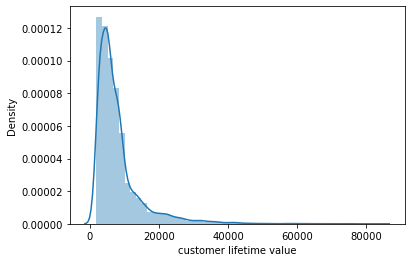

C:\Users\Jobandtalent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


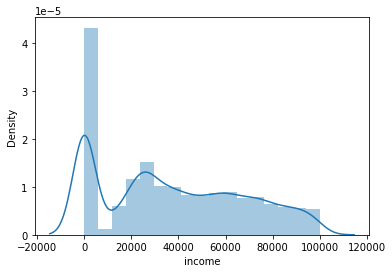

C:\Users\Jobandtalent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


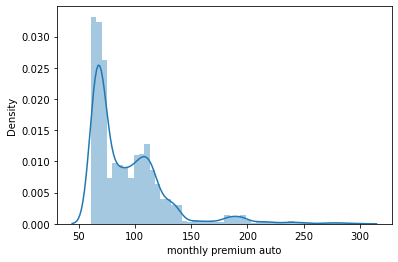

C:\Users\Jobandtalent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


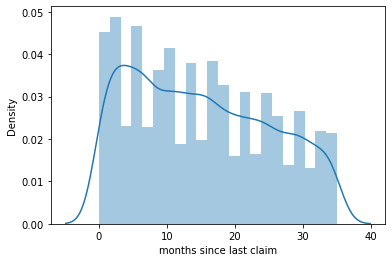

C:\Users\Jobandtalent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


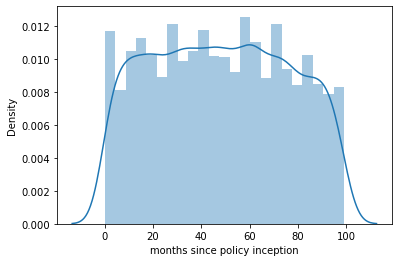

C:\Users\Jobandtalent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


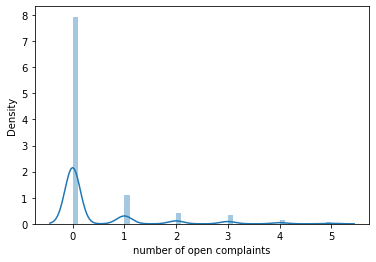

C:\Users\Jobandtalent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


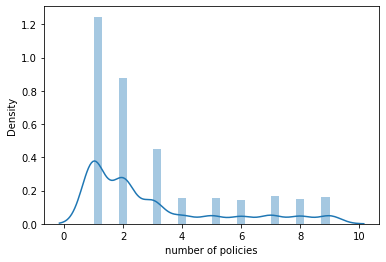

C:\Users\Jobandtalent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


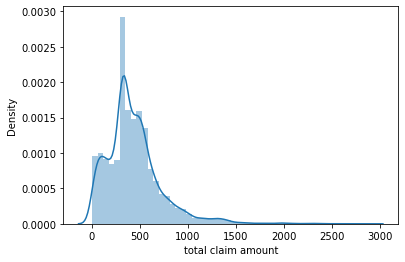

In [12]:
for col in numerical_data.columns:
    sns.distplot(numerical_data[col])
    plt.show()

##### Bivariate analysis (Categorical columns)

In [13]:
dataset.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [14]:
non_numerical_data = dataset.select_dtypes(include=['object'])
non_numerical_data

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


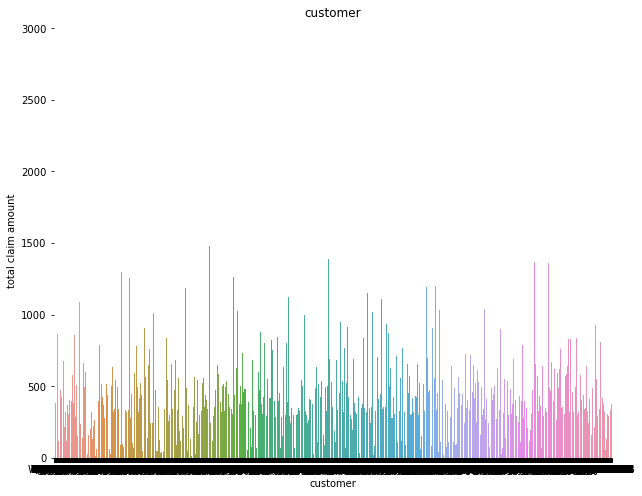

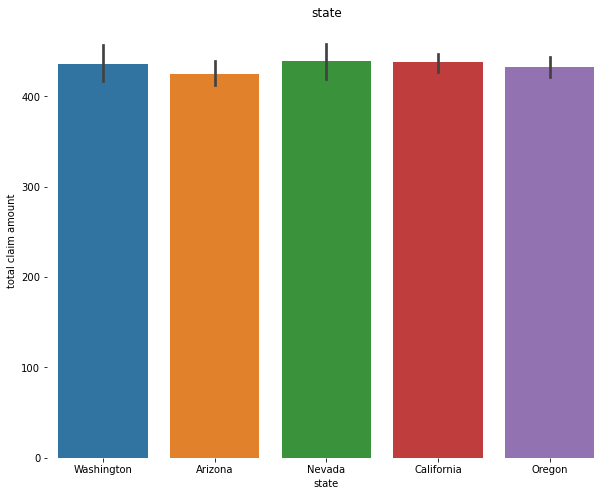

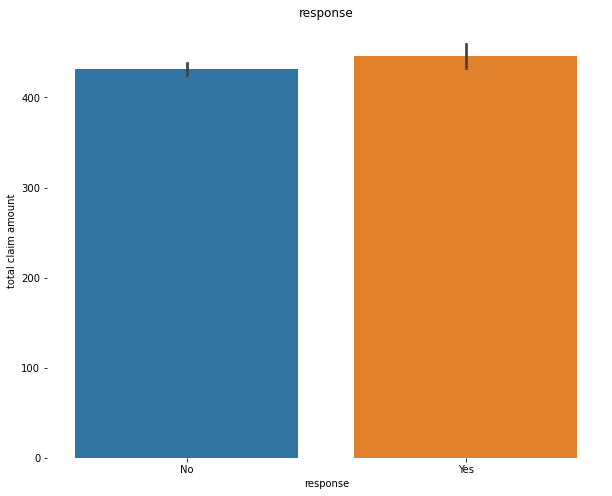

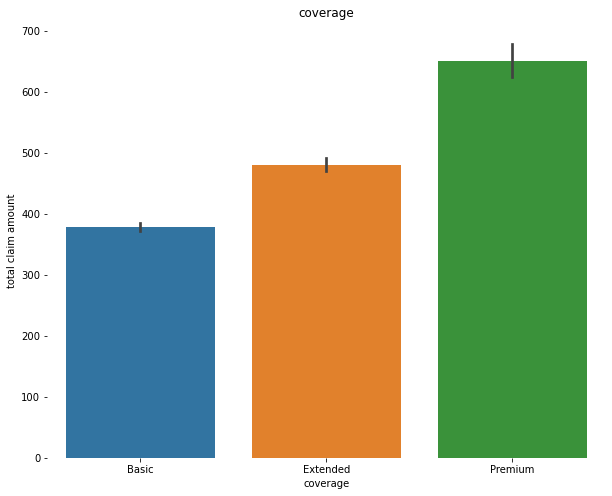

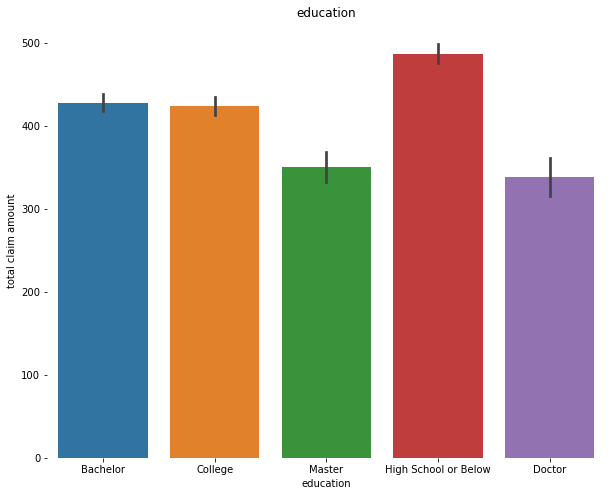

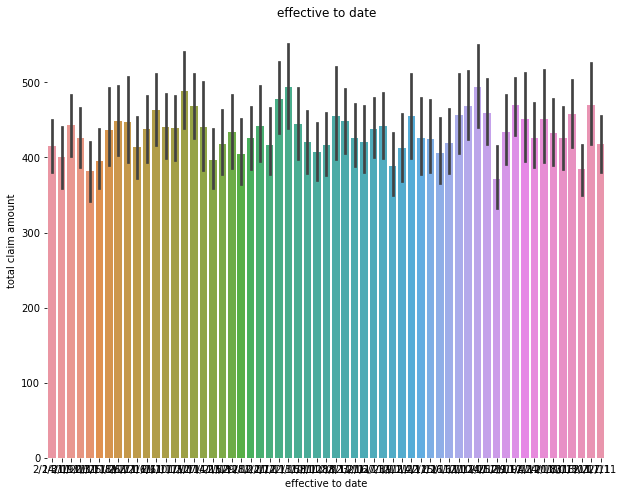

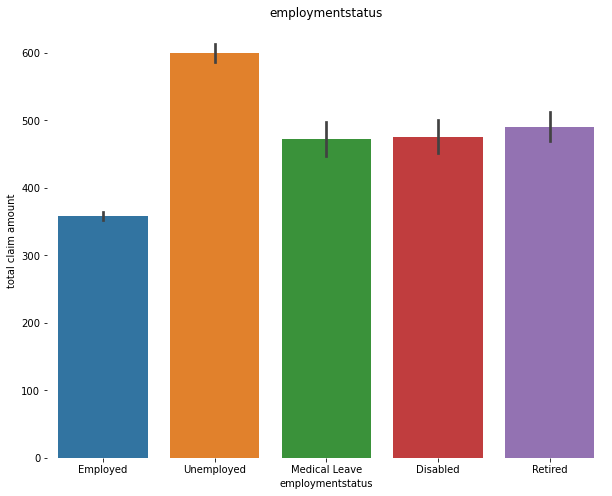

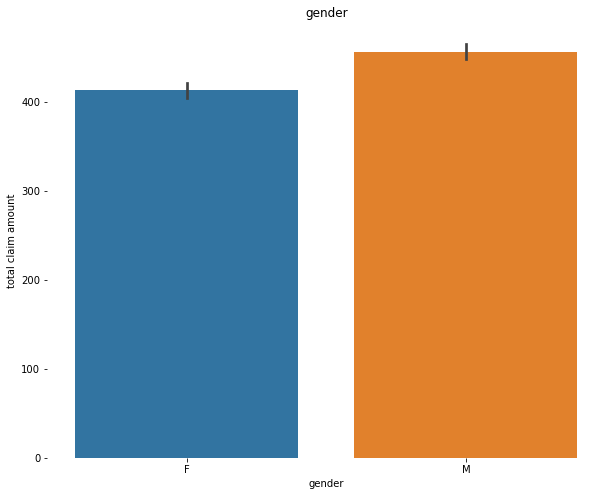

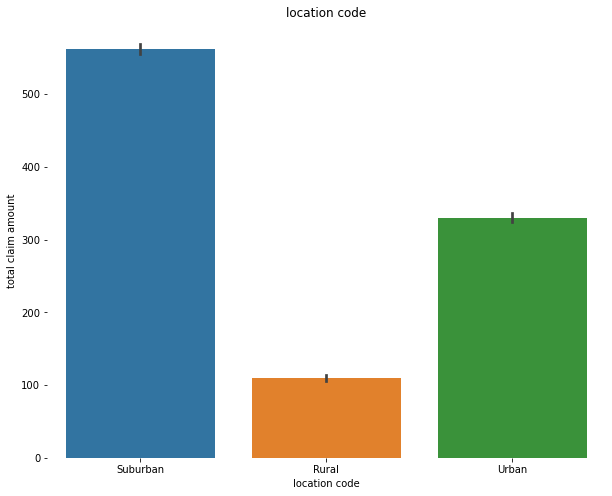

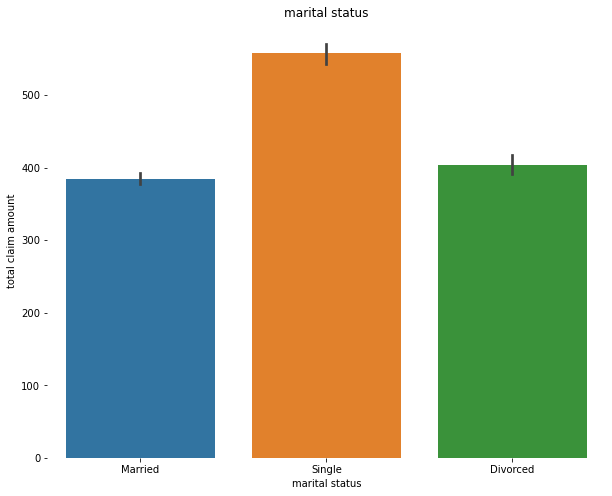

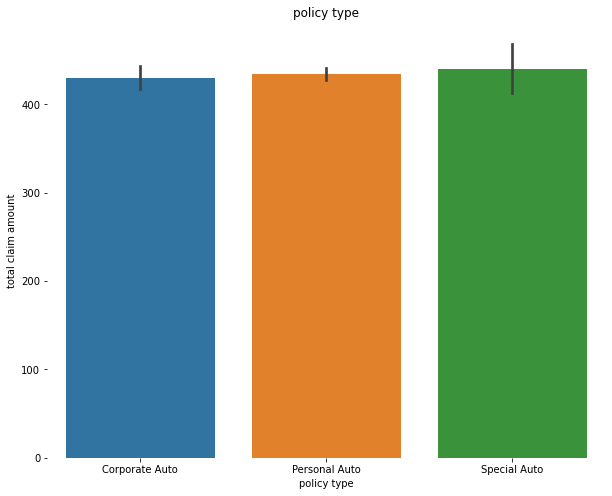

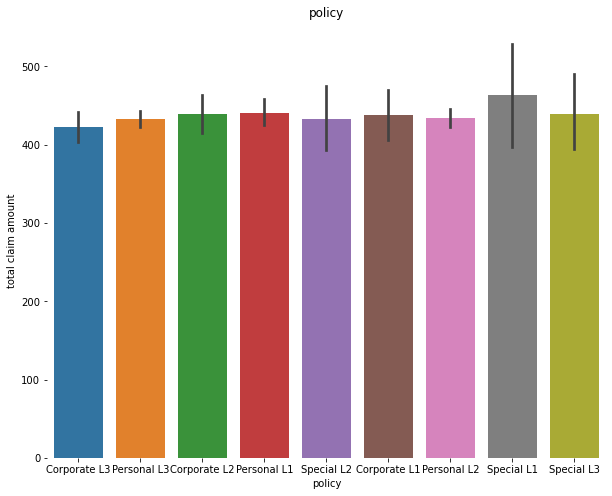

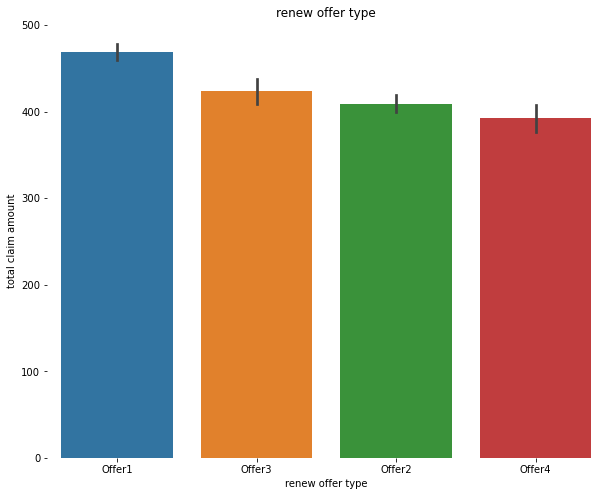

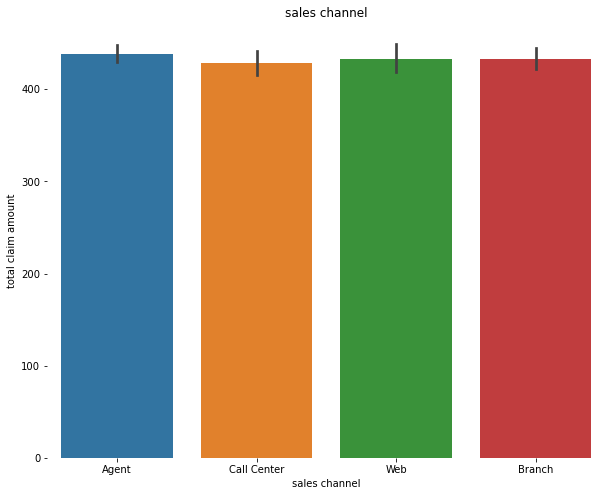

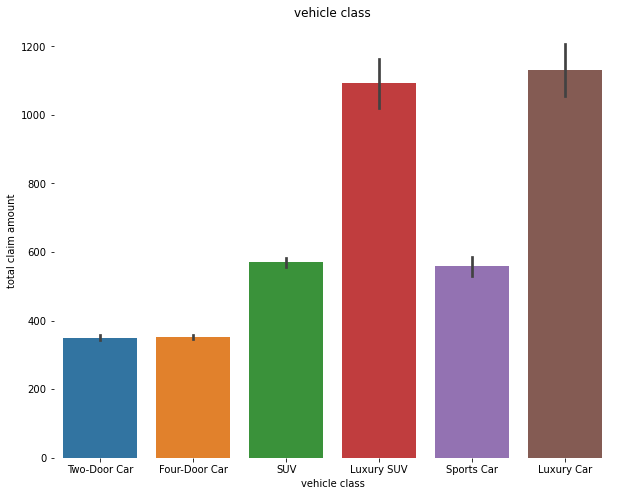

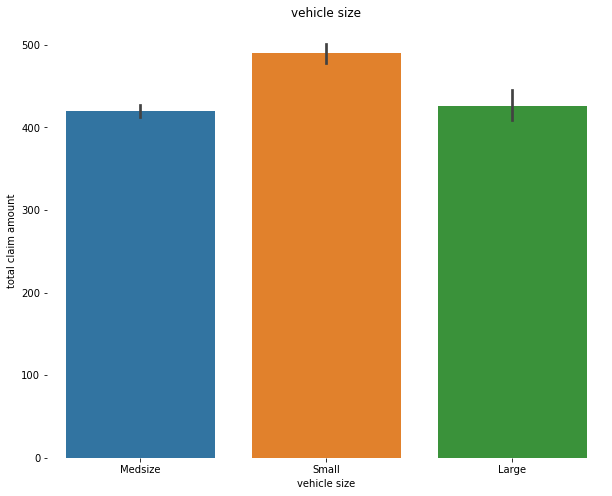

In [15]:
for col in non_numerical_data.columns:
    plt.figure(figsize=(10,8))
    sns.barplot(y = 'total claim amount', x = col,data = dataset)
    sns.despine(bottom = True, left = True)
    plt.title(col)
    plt.show()

We use this analysis to understand the impact of the categorical attributes in the target attribute which is the total claim amount.

From my point of view I can see that there is some correlation between total claim amount and: coverage - gender - location code - marital status - renew offer type - vehicle class - vehicle size. 

This are the categorical attributes I will use as a first approach.

For a more exclusive approach I will try to improve the model using only: coverage - location code - renew offer type


#### 05 understand correlation

In [16]:
dataset.corr("spearman")

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
monthly premium auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
months since last claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
months since policy inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
number of open complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
number of policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
total claim amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


In [18]:
dataset.corr("spearman")['total claim amount'] # We use "Total claim amount" as the target variable as we want to analyze the customers profitability

customer lifetime value          0.210598
income                          -0.401598
monthly premium auto             0.522261
months since last claim         -0.000782
months since policy inception   -0.006569
number of open complaints       -0.024694
number of policies              -0.011100
total claim amount               1.000000
Name: total claim amount, dtype: float64

we can observe that the total claim amount is very low correlated with most numerical variables. 

Positive correlation: Monthly premium auto - customer lifetime value
Negative correlation: income

But for a first approach we will use ALL variables. 

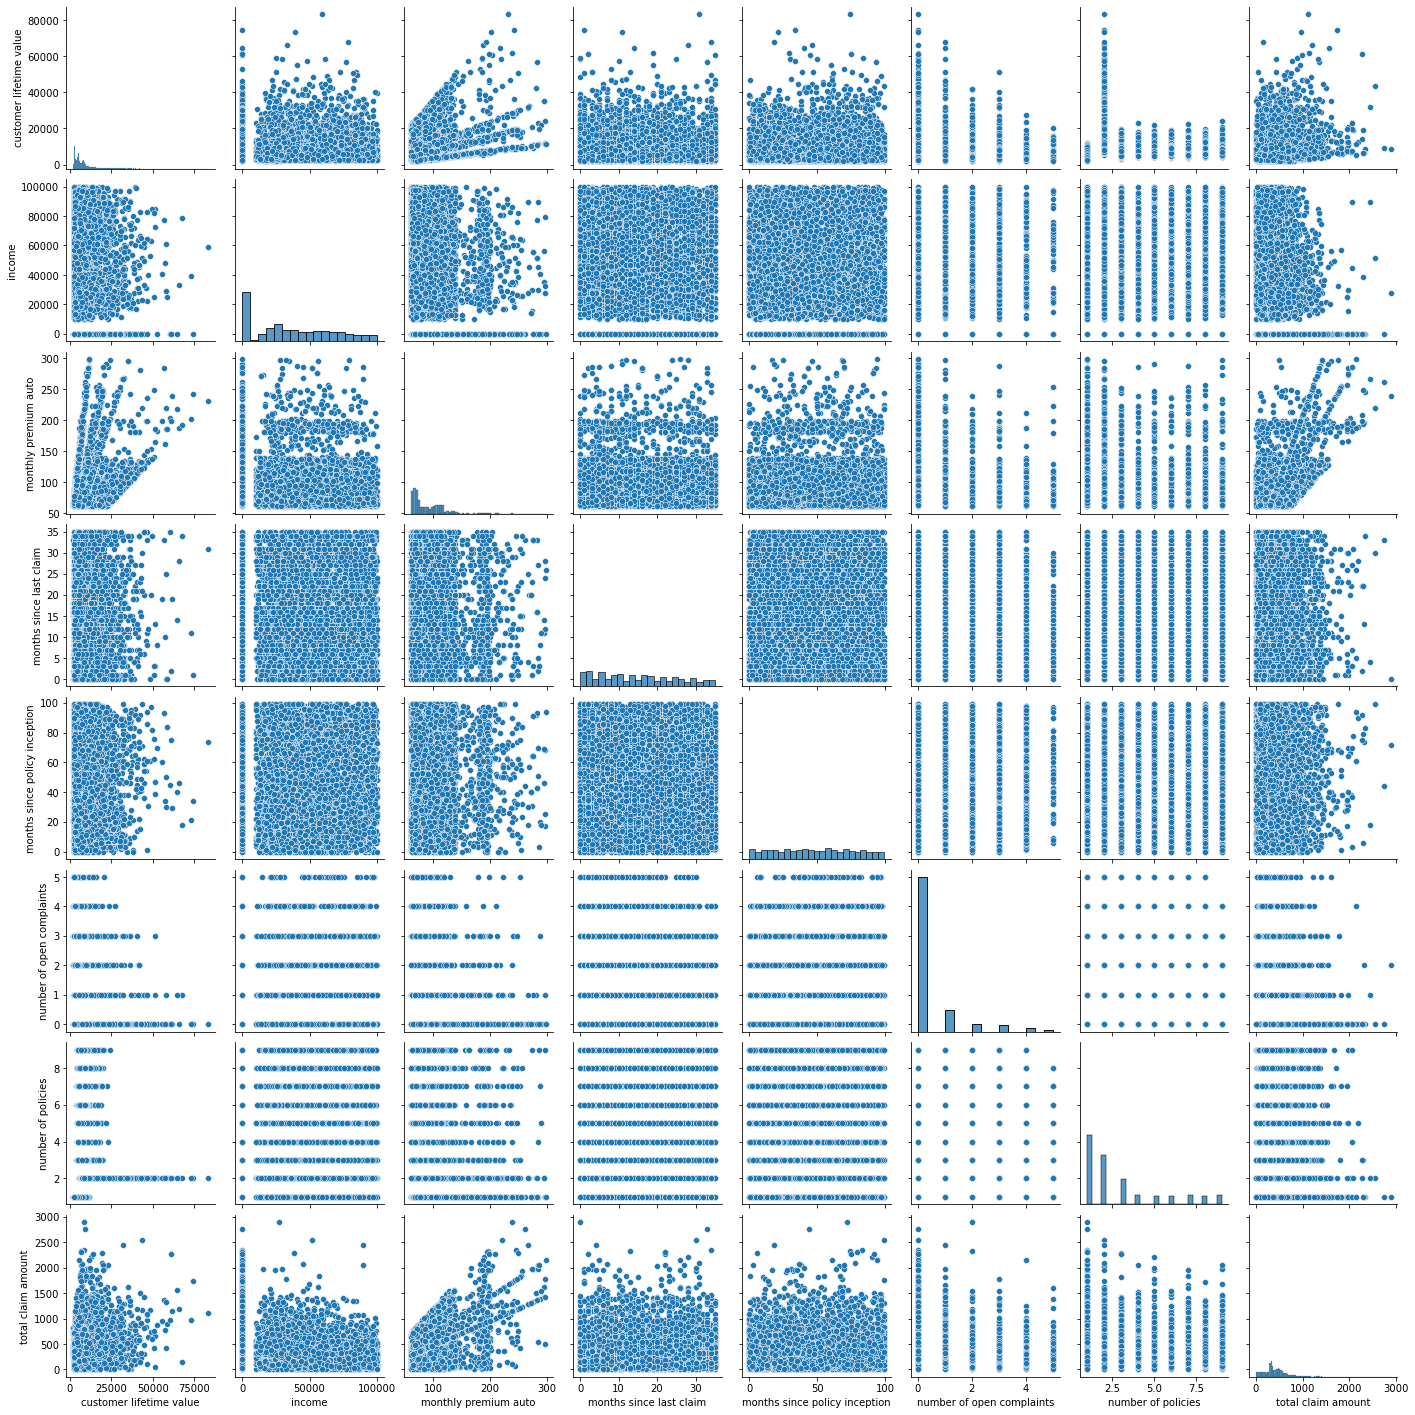

In [19]:
#Now we want to understand if there is linear correlation

sns.pairplot(dataset)

We observe that there is little correlation between data. 

customer lifetime value


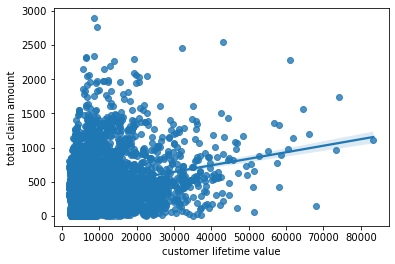

income


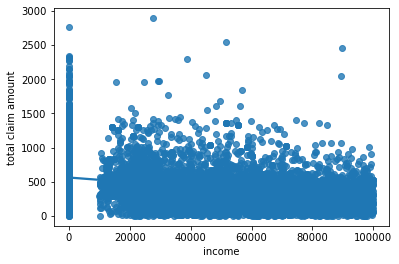

monthly premium auto


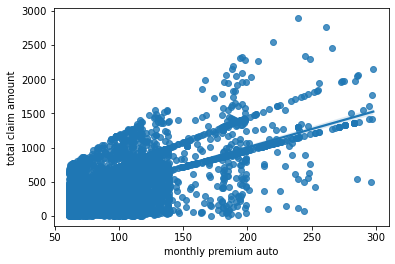

months since last claim


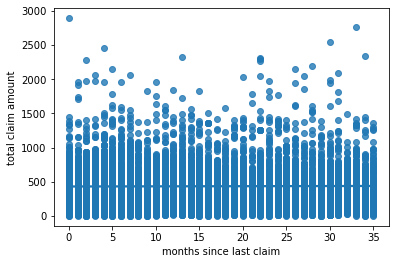

months since policy inception


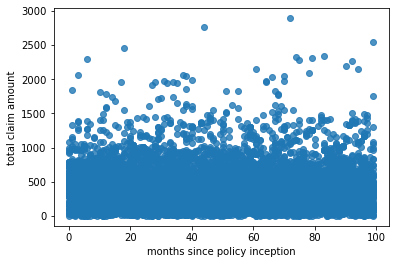

number of open complaints


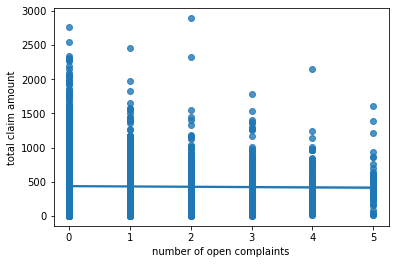

number of policies


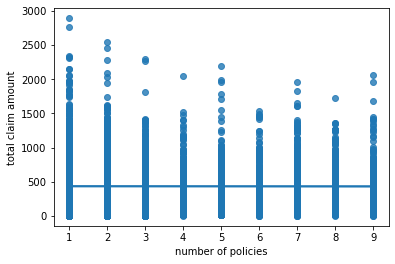

total claim amount


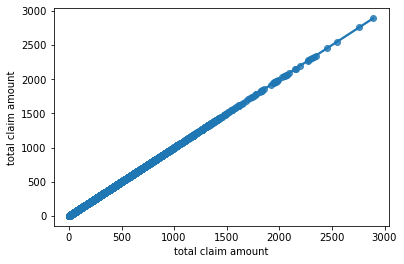

In [212]:
#regplot
for i in numerical_data:
    print(i)
    sns.regplot(x = i, y = 'total claim amount',data = dataset)
    plt.show()

We can observe that none of the attributes are near the confidence area.  

# 04 Processing data

### checking for outliers

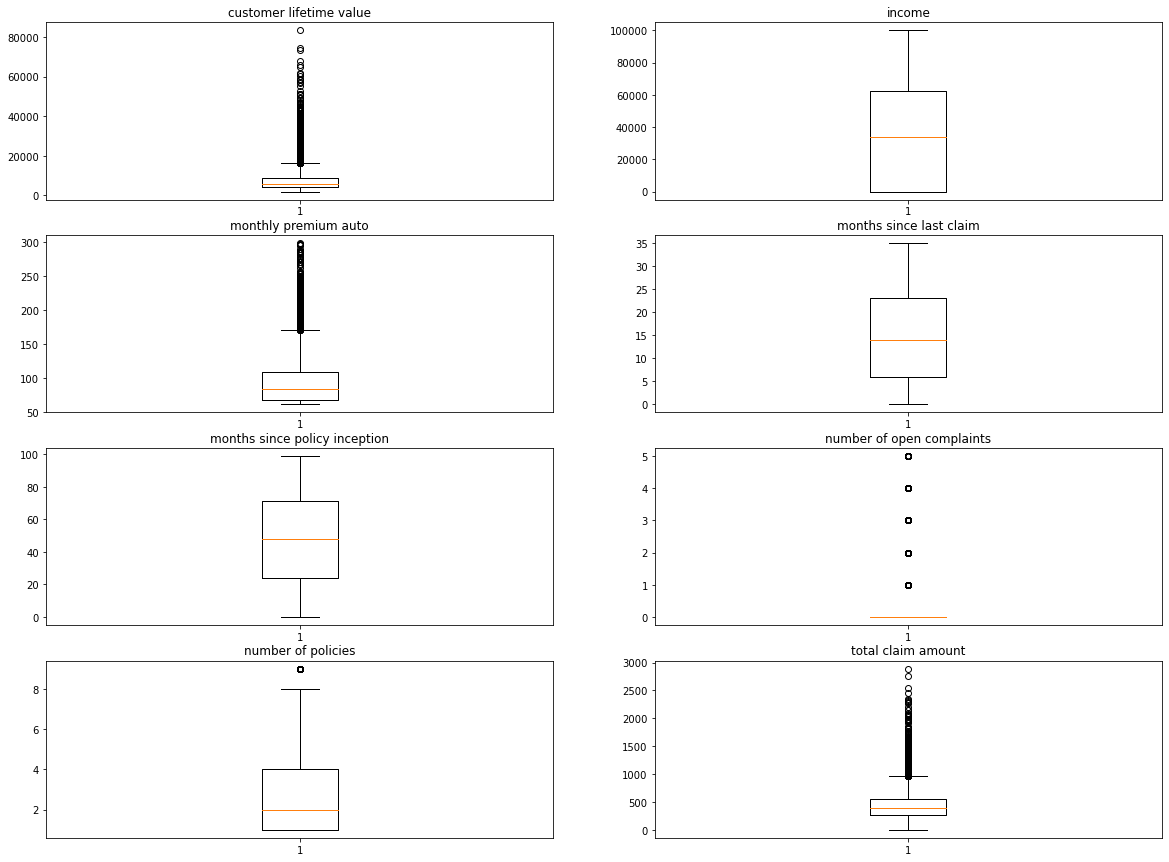

In [20]:
# to check outliers we will plot boxplot. 



fig, axs = plt.subplots(4, 2, figsize=(20,15))

axs[0, 0].boxplot(dataset['customer lifetime value'])
axs[0, 1].boxplot(dataset['income'])
axs[1, 0].boxplot(dataset['monthly premium auto'])
axs[1, 1].boxplot(dataset['months since last claim'])
axs[2, 0].boxplot(dataset['months since policy inception'])
axs[2, 1].boxplot(dataset['number of open complaints'])
axs[3, 0].boxplot(dataset['number of policies'])
axs[3, 1].boxplot(dataset['total claim amount'])

axs[0, 0].title.set_text('customer lifetime value')
axs[0, 1].title.set_text('income')
axs[1, 0].title.set_text('monthly premium auto')
axs[1, 1].title.set_text('months since last claim')
axs[2, 0].title.set_text('months since policy inception')
axs[2, 1].title.set_text('number of open complaints')
axs[3, 0].title.set_text('number of policies')
axs[3, 1].title.set_text('total claim amount')

plt.show()

The boxplot shows us that there are outliers in total claim amount, monthly premium auto and customer lifetime value. We will remove the with the interquartile range. But we are only going to remove the outliers from the total claim amount. 

In [21]:
dataset.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


 Removing outliers


In [22]:
numerical_data.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

In [23]:
cols = ['total claim amount'] # one or more

Q1 = dataset[cols].quantile(0.25)
Q3 = dataset[cols].quantile(0.75)
IQR = Q3 - Q1

dataset = dataset[~((dataset[cols] < (Q1 - 1.5 * IQR)) |(dataset[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
dataset.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000
mean,7691.288196,38671.169105,89.033061,15.034904,47.966018,0.385555,2.958530,390.034963
std,6376.126782,30320.745669,27.095584,10.072207,27.855645,0.912948,2.383001,211.184004
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3893.305281,12430.000000,68.000000,6.000000,24.000000,0.000000,1.000000,256.438030
50%,5635.746396,35205.000000,80.000000,14.000000,48.000000,0.000000,2.000000,364.800000
75%,8696.710700,63288.000000,106.000000,23.000000,71.000000,0.000000,4.000000,523.815839
max,67907.270500,99981.000000,296.000000,35.000000,99.000000,5.000000,9.000000,960.115399


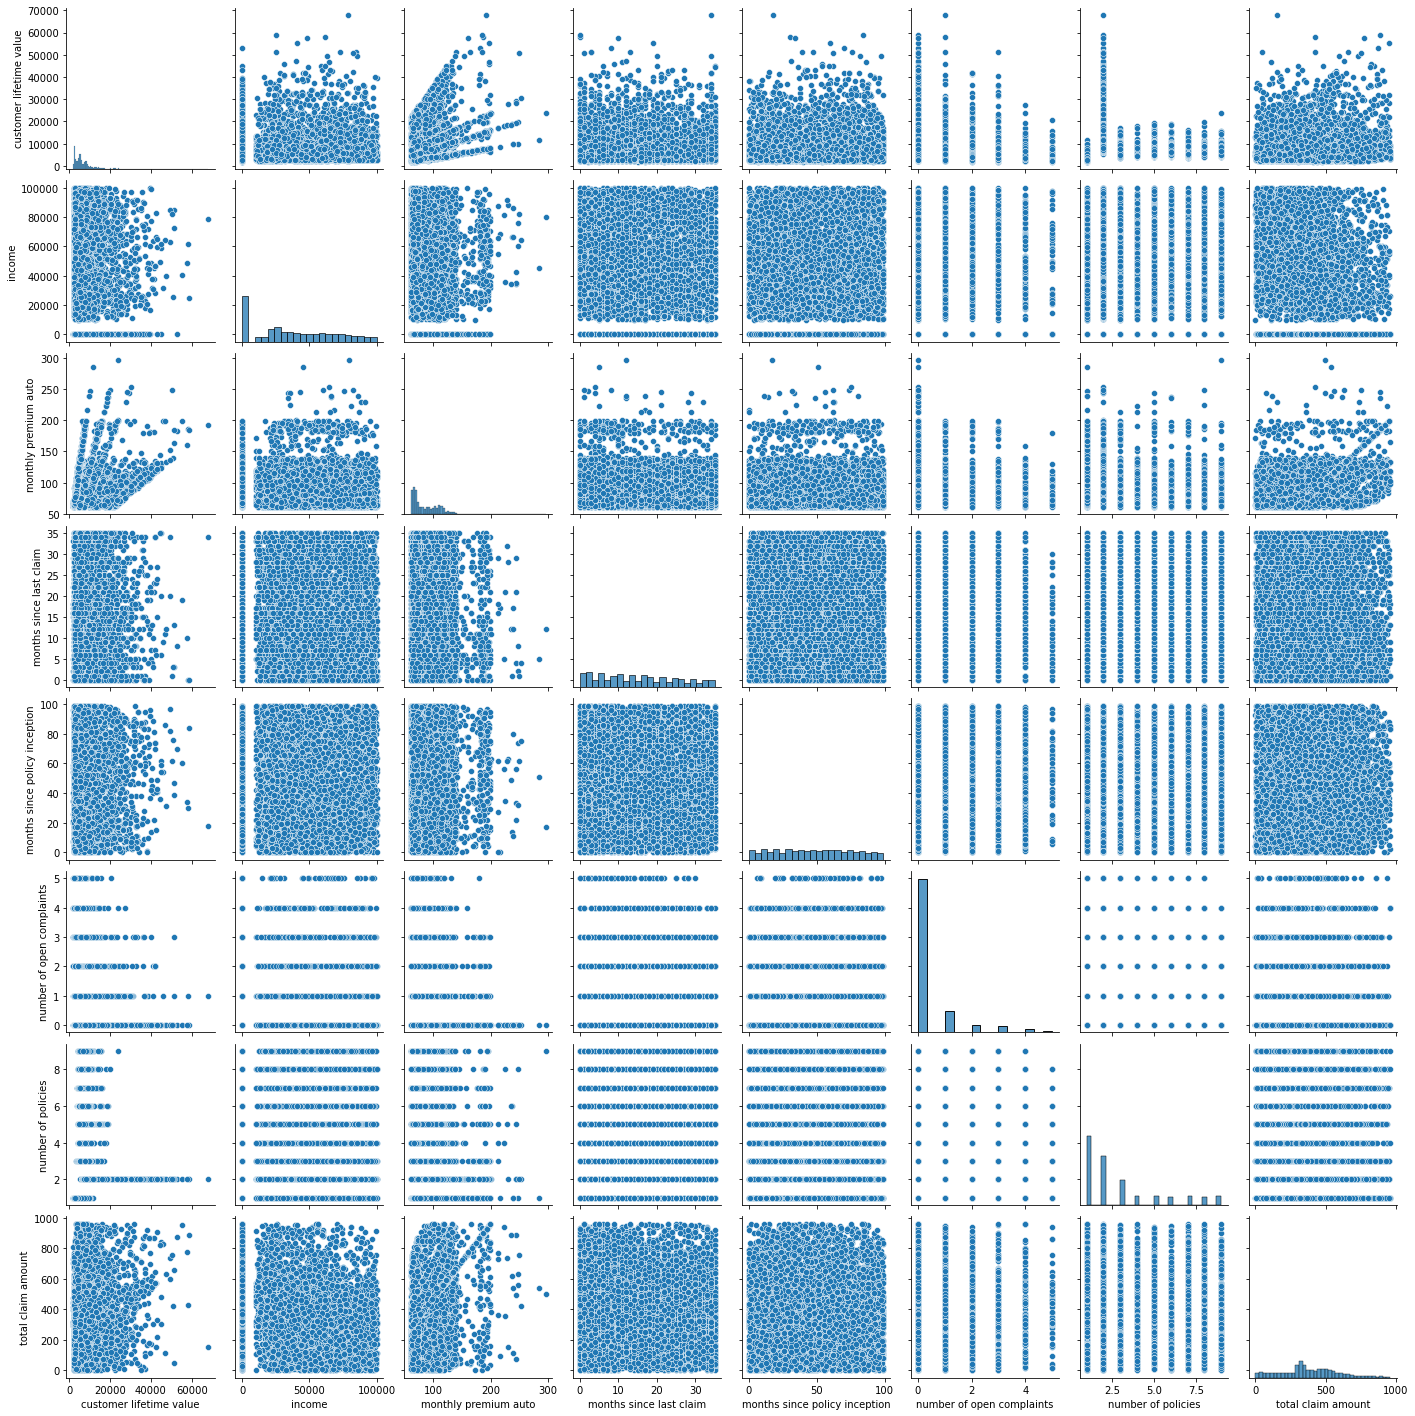

In [25]:
sns.pairplot(dataset)

In [26]:
dataset.corr('spearman')['total claim amount']

customer lifetime value          0.157077
income                          -0.382655
monthly premium auto             0.458496
months since last claim         -0.012486
months since policy inception   -0.013822
number of open complaints       -0.026961
number of policies              -0.014411
total claim amount               1.000000
Name: total claim amount, dtype: float64

The first observation is that the correlation decrease when we remove the outliers. 

### Preparing data for modelisation

In [27]:
dataset.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [28]:
numerical_data.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

In [31]:
# Here we select only the columns that make sense in our analysis. These are the ones that are correlated with the total claim amount
#From the categorical variables I will choose some of them in this first analysis in order to make the code lighter to process. 

X = dataset.iloc[: ,[2,3,4,8,9,10,12,13,14,15,16,17,18,19,22]] #Explanatory variables
y = dataset.iloc[:, [21]] #Target variable
y

,total claim amount
0,384.811147
2,566.472247
3,529.881344
4,138.130879
5,159.383042
...,...
9129,198.234764
9130,379.200000
9131,790.784983
9132,691.200000


In [32]:
# Dummyfication
X = pd.get_dummies(X, drop_first=True)
X
#drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response_Yes,coverage_Extended,coverage_Premium,...,policy_Special L2,policy_Special L3,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car
0,2763.519279,56274,69,32,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12887.431650,48767,108,18,38,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,7645.861827,0,106,18,65,0,7,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2813.692575,43836,73,12,44,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8256.297800,62902,69,14,94,0,2,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9130,3096.511217,21604,79,14,28,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9131,8163.890428,0,85,9,37,3,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9132,7524.442436,21941,96,34,3,0,3,0,1,0,...,0,0,0,1,0,0,0,0,0,0


Separation between train and test set

In [33]:
# Division of the dataset into trains and a test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [34]:
X_train

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response_Yes,coverage_Extended,coverage_Premium,...,policy_Special L2,policy_Special L3,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car
7163,2879.505701,42247,74,4,52,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2420,7224.235434,0,72,27,21,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8362,2889.087654,72075,73,32,1,2,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
32,4715.321344,0,65,19,56,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7370,7326.544855,62338,92,9,61,0,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,7431.664369,27688,92,8,86,0,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8299,7756.174223,21326,99,22,9,0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5111,5862.803295,75121,73,12,22,0,6,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3418,10484.915350,61108,89,22,93,0,2,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
X_test

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response_Yes,coverage_Extended,coverage_Premium,...,policy_Special L2,policy_Special L3,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car
2526,18380.390260,50407,92,30,67,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8894,7330.190221,26906,92,17,12,0,3,0,1,0,...,0,0,0,1,0,0,0,0,0,1
7009,10719.084670,86036,90,8,20,3,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8932,6570.970605,52951,167,3,43,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8034,8571.480718,56202,107,19,33,0,8,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,12731.951610,40870,105,3,56,0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7241,2803.596080,60707,70,2,24,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5834,4328.373176,72531,109,35,20,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2597,2347.048112,31617,62,17,29,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
print("Nb of rows of X_train = {}".format(len(X_train)))
print("Nb of rows of X_test = {}".format(len(X_test)))
print("Nb of rows of = {}".format(len(y_train)))
print("Nb of rows of y_test = {}".format(len(y_test)))

Nb of rows of X_train = 6944
Nb of rows of X_test = 1737
Nb of rows of = 6944
Nb of rows of y_test = 1737


Standarization and normalization of the explanatory vairables

In [37]:
# Normalisation of X
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [38]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [39]:
X_test

array([[ 1.65193927,  0.38642819,  0.11218518, ..., -0.48242685,
        -0.22372511, -0.52825838],
       [-0.06166002, -0.38936759,  0.11218518, ..., -0.48242685,
        -0.22372511,  1.89301303],
       [ 0.46386957,  1.56258358,  0.03880407, ..., -0.48242685,
        -0.22372511, -0.52825838],
       ...,
       [-0.52716396,  1.11676757,  0.73592464, ..., -0.48242685,
         4.46977091, -0.52825838],
       [-0.83441606, -0.23385191, -0.98853151, ..., -0.48242685,
        -0.22372511, -0.52825838],
       [ 0.19901004,  1.65078945,  0.8459963 , ..., -0.48242685,
         4.46977091, -0.52825838]])

Creating a model with sklearn

In [40]:
# Creating the model
#First we choose a model from the sklearn. 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #instanciation of the model

In [41]:
regressor.fit(X_train,y_train)

LinearRegression()

In [42]:
regressor.coef_

array([[-6.89323140e-01, -2.43075650e+01,  9.14329030e+01,
         8.05777773e-01, -1.75414063e+00, -9.29227816e-01,
        -2.32123874e-02, -7.51258497e+00,  3.94763260e+00,
         5.01330192e+00,  4.14917786e+00,  1.82292949e+02,
         8.50548971e+01,  1.46903591e+14,  9.40167915e+13,
         6.63919407e-01,  6.91737940e-01, -1.15499732e+14,
        -1.42313756e+14, -1.63432885e+14, -3.84431529e+13,
        -6.22607376e+13, -6.09938954e+13,  3.17285884e+00,
         2.14731955e+00,  1.44953736e+00, -8.77448097e-01,
        -2.05743324e+00,  1.15512637e+01,  3.85037043e+00,
         1.65410666e+00]])

Performance Evaluation

In [43]:
# Verifying overfitting
# si no sabemos que score coger. vamos a google SKlearn y miramos que paquete hemos cogido. en este caso linear.model --> linear regression. 
#si el R2 es cerca de 1 es perfecto. 


print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score of Train : 0.7717564415626215
 Score of Test : 0.7707670950678841


Test is very similar to the train set so there is no overfitting. 

# Model Validation

In [44]:
# evaluating sklearn's LR model TRAIN/TEST
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions = regressor.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y, predictions)
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse is good to see if the errors are big, the values returned are in the same unit as the target
print("R2_score:", round(regressor.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: -6.660380968590489e+21
RMSE: 17233978242960.914
MAE: 12976265493739.729


C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Negative R2 score gives us that the model is very bad.

In [45]:
y_pred = regressor.predict(X_train)

In [46]:
predictions_test = regressor.predict(X_test)

In [47]:
x = predictions_test
y = y_test

In [48]:
x.size

1737

In [53]:
t = np.arange(0,1737)

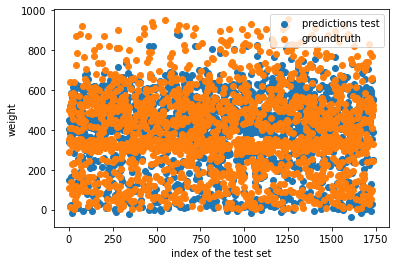

In [54]:
fig, ax = plt.subplots()

plt.scatter(t,x)
plt.scatter(t,y)

plt.xlabel("index of the test set")
plt.ylabel("weight")

plt.legend(["predictions test", "groundtruth"], loc = "upper right")

plt.show()

# 07 Model Improvement

In [56]:
dataset.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [60]:
# Here we select only the columns that make sense in our analysis. These are the ones that are correlated with the total claim amount
#From the categorical variables I will choose some of them in this first analysis in order to make the code lighter to process. 
# To improve model we select the following columns: categorical attributes: coverage - location code - renew offer type. numerical attributes: Monthly premium auto - customer lifetime value - income  
X = dataset.iloc[: ,[2,4,9,10,12,19]] #Explanatory variables
y = dataset.iloc[:, [21]] #Target variable
X

,customer lifetime value,coverage,income,location code,monthly premium auto,renew offer type
0,2763.519279,Basic,56274,Suburban,69,Offer1
2,12887.431650,Premium,48767,Suburban,108,Offer1
3,7645.861827,Basic,0,Suburban,106,Offer1
4,2813.692575,Basic,43836,Rural,73,Offer1
5,8256.297800,Basic,62902,Rural,69,Offer2
...,...,...,...,...,...,...
9129,23405.987980,Basic,71941,Urban,73,Offer2
9130,3096.511217,Extended,21604,Suburban,79,Offer1
9131,8163.890428,Extended,0,Suburban,85,Offer1
9132,7524.442436,Extended,21941,Suburban,96,Offer3


In [61]:
# Dummyfication
X = pd.get_dummies(X, drop_first=True)
X
#drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

,customer lifetime value,income,monthly premium auto,coverage_Extended,coverage_Premium,location code_Suburban,location code_Urban,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4
0,2763.519279,56274,69,0,0,1,0,0,0,0
2,12887.431650,48767,108,0,1,1,0,0,0,0
3,7645.861827,0,106,0,0,1,0,0,0,0
4,2813.692575,43836,73,0,0,0,0,0,0,0
5,8256.297800,62902,69,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,0,0,0,1,1,0,0
9130,3096.511217,21604,79,1,0,1,0,0,0,0
9131,8163.890428,0,85,1,0,1,0,0,0,0
9132,7524.442436,21941,96,1,0,1,0,0,1,0


In [62]:
# Division of the dataset into trains and a test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [63]:
# Normalisation of X
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [64]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [65]:
# Creating the model
#First we choose a model from the sklearn. 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #instanciation of the model

In [66]:
regressor.fit(X_train,y_train)

LinearRegression()

In [67]:
regressor.coef_

array([[ -0.60252233, -24.67456122,  98.71366929,   1.76872472,
          1.6360005 , 182.12063799,  85.16505679,   2.49627873,
          3.17912156,   2.28195622]])

In [68]:
# Verifying overfitting
# si no sabemos que score coger. vamos a google SKlearn y miramos que paquete hemos cogido. en este caso linear.model --> linear regression. 
#si el R2 es cerca de 1 es perfecto. 


print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score of Train : 0.7680173477524059
 Score of Test : 0.7661525954681672


In [69]:
# evaluating sklearn's LR model TRAIN/TEST
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions = regressor.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y, predictions)
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse is good to see if the errors are big, the values returned are in the same unit as the target
print("R2_score:", round(regressor.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: -32785314.85
RMSE: 1209137.5005578944
MAE: 952170.4151836202


C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [70]:
# the model is very bad. So we continue removing attributes. 

In [71]:
# Here we select only the columns that make sense in our analysis. These are the ones that are correlated with the total claim amount
#From the categorical variables I will choose some of them in this first analysis in order to make the code lighter to process. 
# To improve model we select the following columns: categorical attributes: coverage - location code - renew offer type. numerical attributes: Monthly premium auto - customer lifetime value - income  
X = dataset.iloc[: ,[2,4,9,10,12]] #Explanatory variables
y = dataset.iloc[:, [21]] #Target variable
X

,customer lifetime value,coverage,income,location code,monthly premium auto
0,2763.519279,Basic,56274,Suburban,69
2,12887.431650,Premium,48767,Suburban,108
3,7645.861827,Basic,0,Suburban,106
4,2813.692575,Basic,43836,Rural,73
5,8256.297800,Basic,62902,Rural,69
...,...,...,...,...,...
9129,23405.987980,Basic,71941,Urban,73
9130,3096.511217,Extended,21604,Suburban,79
9131,8163.890428,Extended,0,Suburban,85
9132,7524.442436,Extended,21941,Suburban,96


In [72]:
# Dummyfication
X = pd.get_dummies(X, drop_first=True)
X
#drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

,customer lifetime value,income,monthly premium auto,coverage_Extended,coverage_Premium,location code_Suburban,location code_Urban
0,2763.519279,56274,69,0,0,1,0
2,12887.431650,48767,108,0,1,1,0
3,7645.861827,0,106,0,0,1,0
4,2813.692575,43836,73,0,0,0,0
5,8256.297800,62902,69,0,0,0,0
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,0,0,0,1
9130,3096.511217,21604,79,1,0,1,0
9131,8163.890428,0,85,1,0,1,0
9132,7524.442436,21941,96,1,0,1,0


In [73]:
# Division of the dataset into trains and a test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [74]:
# Normalisation of X
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [75]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [76]:
# Creating the model
#First we choose a model from the sklearn. 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #instanciation of the model

In [77]:
regressor.fit(X_train,y_train)

LinearRegression()

In [78]:
regressor.coef_

array([[ -0.75140556, -24.13376932,  98.50761799,   1.85488391,
          1.51061829, 182.09835065,  85.14658015]])

In [79]:
# Verifying overfitting
# si no sabemos que score coger. vamos a google SKlearn y miramos que paquete hemos cogido. en este caso linear.model --> linear regression. 
#si el R2 es cerca de 1 es perfecto. 


print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score of Train : 0.7677647726644995
 Score of Test : 0.7660474366004433


In [80]:
# evaluating sklearn's LR model TRAIN/TEST
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions = regressor.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y, predictions)
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse is good to see if the errors are big, the values returned are in the same unit as the target
print("R2_score:", round(regressor.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: -31410181.44
RMSE: 1183508.0988058231
MAE: 932058.7560116183


C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [110]:
# Here we select only the columns that make sense in our analysis. These are the ones that are correlated with the total claim amount
#From the categorical variables I will choose some of them in this first analysis in order to make the code lighter to process. 
# To improve model we select the following columns: categorical attributes: coverage - location code - renew offer type. numerical attributes: Monthly premium auto - customer lifetime value - income  
X = dataset.iloc[: ,[2,12]] #Explanatory variables
y = dataset.iloc[:, [21]] #Target variable
X

,customer lifetime value,monthly premium auto
0,2763.519279,69
2,12887.431650,108
3,7645.861827,106
4,2813.692575,73
5,8256.297800,69
...,...,...
9129,23405.987980,73
9130,3096.511217,79
9131,8163.890428,85
9132,7524.442436,96


In [111]:
# Dummyfication
X = pd.get_dummies(X, drop_first=True)
X
#drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

,customer lifetime value,monthly premium auto
0,2763.519279,69
2,12887.431650,108
3,7645.861827,106
4,2813.692575,73
5,8256.297800,69
...,...,...
9129,23405.987980,73
9130,3096.511217,79
9131,8163.890428,85
9132,7524.442436,96


In [112]:
# Division of the dataset into trains and a test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [113]:
# Normalisation of X
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [114]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [115]:
# Creating the model
#First we choose a model from the sklearn. 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #instanciation of the model

In [116]:
regressor.fit(X_train,y_train)

LinearRegression()

In [117]:
regressor.coef_

array([[-4.54307918, 97.50985421]])

In [118]:
# Verifying overfitting
# si no sabemos que score coger. vamos a google SKlearn y miramos que paquete hemos cogido. en este caso linear.model --> linear regression. 
#si el R2 es cerca de 1 es perfecto. 


print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score of Train : 0.20482956715052425
 Score of Test : 0.18161337301721536


In [109]:
# evaluating sklearn's LR model TRAIN/TEST
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions = regressor.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y, predictions)
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse is good to see if the errors are big, the values returned are in the same unit as the target
print("R2_score:", round(regressor.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: -318400985.3
RMSE: 3768106.8291615457
MAE: 2978323.7322929604


C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
